In [1]:

#----*----------------*------
# Read data in
#----*----------------*------

import pandas as pd
df=pd.read_csv("/Users/sowjanyakoka/Desktop/Spring2020/DataMining/twitter-hate-speech/train_E6oV3lV.csv",sep=",",engine='python')



In [2]:
#----*---------------------------*------
# Sentiment Analysis using Vader
#----*---------------------------*------

features = df.iloc[:,2].values
features


array([' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
       "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
       '  bihday your majesty', ...,
       'listening to sad songs on a monday morning otw to work is sad  ',
       '@user #sikh #temple vandalised in in #calgary, #wso condemns  act  ',
       'thank you @user for you follow  '], dtype=object)

In [3]:

import statistics 
import numpy as np 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
positive=list()
negative=list()
neutral=list()
main_list=list()
index_product=list()
dic={}
for i in range(0,len(features),1):
    score = analyser.polarity_scores(features[i])
    #df['Sentiment'] = np.where(score['neg']>0.25, 'BlackList','Average/Good')
    positive.append(score['pos'])
    negative.append(score['neg'])
    neutral.append(score['neu'])
    #df['Sentiment'] = np.where(score['pos']>=50, 'Good')
    #print("Product:", df.iloc[i,1] , "Score:", score)
    main_list.append(score)
    
main_list


[{'neg': 0.369, 'neu': 0.631, 'pos': 0.0, 'compound': -0.8296},
 {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.6705},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.7249},
 {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.34},
 {'neg': 0.323, 'neu': 0.5, 'pos': 0.177, 'compound': -0.4215},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'compound': -0.5719},
 {'neg': 0.0, 'neu': 0.391, 'pos': 0.609, 'compound': 0.9256},
 {'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compound': 0.8528},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.296, 'neu': 0.417, 'pos': 0.288, 'compound': -0.0493},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.238, 'neu': 0.762, 'pos': 0.0, 'compound': -0.3595},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.353, 'po

In [4]:
negative1=list()
positive1=list()
neutral1=list()

for i in range(0,len(main_list),1): 
    negative1.append(main_list[i].get("neg"))
    positive1.append(main_list[i].get("pos"))
    neutral1.append(main_list[i].get("neu"))
    
print("Positive: ",statistics.mean(positive1))
print("Negative: ",statistics.mean(negative1))
print("Neutral: ",statistics.mean(neutral1))


Positive:  0.18892475439584508
Negative:  0.0648340529378637
Neutral:  0.746239534447156


In [5]:
index_list_positive=list()
for r in range(0,len(main_list),1):
    if main_list[r]['pos']>=0.1322: 
        index_list_positive.append(r)
        

In [6]:
index_list_negative=list()
for x in range(0,len(main_list),1):
    if main_list[x]['neg']>=0.0538125586634128:
        index_list_negative.append(x)
        

In [7]:
for i in index_list_positive:
    df.loc[df.index[i], 'Sentiment'] = 0
    

for g in index_list_negative:
    df.loc[df.index[g], 'Sentiment'] = 1 
    

In [8]:
df.isna().sum()

df = df.dropna()
df= df.reset_index(drop=True)


In [9]:
l1=list()
val=0
for x in range(0,len(df),1): 
    if df['label'][x]==df['Sentiment'][x]:
        val=val+1
print("Vader Accuracy compared to existing labels: ",val/len(df))

val

len(df)

df.head()

Vader Accuracy compared to existing labels:  0.6217016574585635


,id,label,tweet,Sentiment
0,1,0,@user when a father is dysfunctional and is s...,1.0
1,2,0,@user @user thanks for #lyft credit i can't us...,0.0
2,4,0,#model i love u take with u all the time in ...,0.0
3,5,0,factsguide: society now #motivation,0.0
4,6,0,[2/2] huge fan fare and big talking before the...,1.0


In [10]:

#----*----------------*------
# Data Cleaning
#----*----------------*------
df.head()

df.shape


(22625, 4)

In [11]:

# check for duplicate values
df.drop_duplicates(inplace = True)


In [12]:
# check for missing values in tweet and label columns
print(df['tweet'].isna().sum())
print(df['label'].isna().sum())


0
0


In [13]:
#Data doesn't contain either duplicate values or missing values
df.head()


,id,label,tweet,Sentiment
0,1,0,@user when a father is dysfunctional and is s...,1.0
1,2,0,@user @user thanks for #lyft credit i can't us...,0.0
2,4,0,#model i love u take with u all the time in ...,0.0
3,5,0,factsguide: society now #motivation,0.0
4,6,0,[2/2] huge fan fare and big talking before the...,1.0


In [14]:
# remove @user
df['cleaned_tweet'] = df.tweet.apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('@')]))



In [15]:
# converting everything to lower-case
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x:''.join([x.lower() for word in x.split()]))


In [16]:

# positive hashtags
import nltk
#Select all words from positive tweet
normal_words = ' '.join([word for word in df['cleaned_tweet'][df['Sentiment'] == 0]])
#Collect all hashtags
pos_htag = [htag for htag in normal_words.split() if htag.startswith('#')]
#Remove hashtag symbol (#)
pos_htag = [pos_htag[i][1:] for i in range(len(pos_htag))]
#Count frequency of each word
pos_htag_freqcount = nltk.FreqDist(pos_htag)
pos_htag_df = pd.DataFrame({'Hashtag' : list(pos_htag_freqcount.keys()),
                            'Count' : list(pos_htag_freqcount.values())})
    


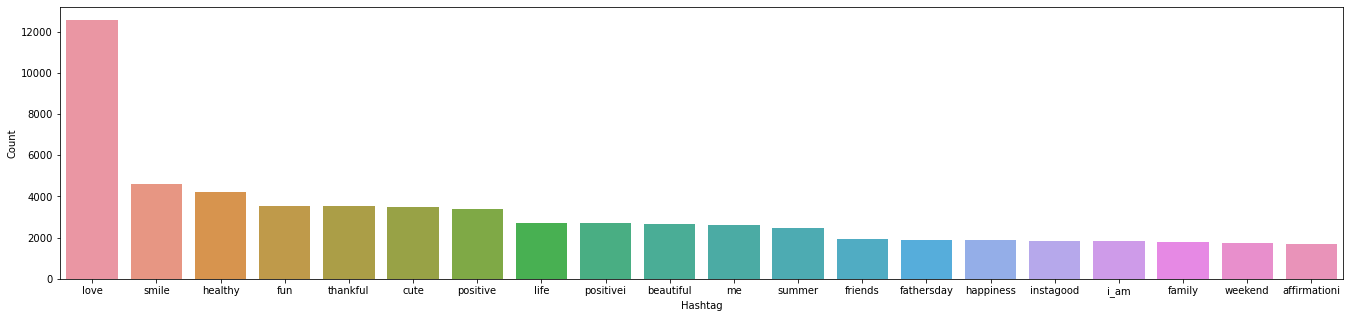

In [17]:
#Select top 20 most frequent hashtags and plot them   
import seaborn as sns
import matplotlib.pyplot as plt 
most_frequent = pos_htag_df.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(23,5))
ax = sns.barplot(data=most_frequent, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()



/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 134 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 134 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, flags=flags)


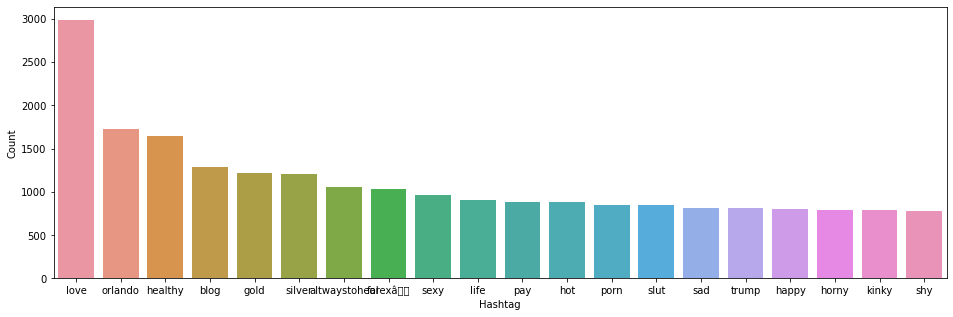

In [18]:
#Repeat same steps for negative tweets
negative_words = ' '.join([word for word in df['cleaned_tweet'][df['Sentiment'] == 1]])
neg_htag = [htag for htag in negative_words.split() if htag.startswith('#')]
neg_htag = [neg_htag[i][1:] for i in range(len(neg_htag))]
neg_htag_freqcount = nltk.FreqDist(neg_htag)
neg_htag_df = pd.DataFrame({'Hashtag' : list(neg_htag_freqcount.keys()),
                            'Count' : list(neg_htag_freqcount.values())})
most_frequent = neg_htag_df.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=most_frequent, x= "Hashtag", y = "Count")
plt.show()




In [19]:
import unidecode
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()]))
    
# Remove punctuation
import string
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))
    
# removing the symbols
df["cleaned_tweet"] = df['cleaned_tweet'].str.replace('[?+-/]',' ')

# removing numbers
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split() if not tweet.isdigit()])) 

#Removing punctuations
df["cleaned_tweet"] = df ['cleaned_tweet'].str.replace('[~`!$%^&*_+-=|\:"]','')

# word-count
df['word_count'] =df['cleaned_tweet'].apply(lambda x: len(str(x).split(" ")))

df.head()



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app


,id,label,tweet,Sentiment,cleaned_tweet,word_count
0,1,0,@user when a father is dysfunctional and is s...,1.0,when a father is dysfunctional and is so selfi...,273
1,2,0,@user @user thanks for #lyft credit i can't us...,0.0,thanks for lyft credit i cant use cause they d...,273
2,4,0,#model i love u take with u all the time in ...,0.0,model i love u take with u all the time in urd...,183
3,5,0,factsguide: society now #motivation,0.0,factsguide society now motivationfactsguide so...,13
4,6,0,[2/2] huge fan fare and big talking before the...,1.0,huge fan fare and big talking before they leav...,342


In [21]:
freq1 = pd.Series(' '.join(df['cleaned_tweet']).split()).value_counts()[:10]
freq1
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


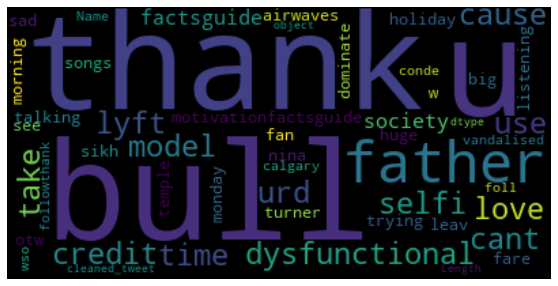

In [22]:
Tweets_wordcloud = WordCloud(stopwords=stop_words,max_font_size=100).generate(str(df.cleaned_tweet))
#Plotting word clouds for all words in tweets
plt.figure(figsize=(16,5))
plt.imshow(Tweets_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



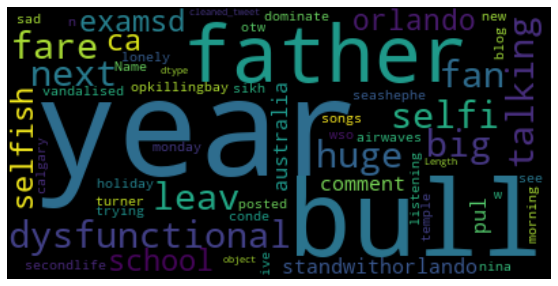

In [23]:
Neg_wordcloud=WordCloud(stopwords=stop_words,max_font_size=100).generate(str(df[df.Sentiment==1].cleaned_tweet))
#Plotting word clouds for all words in hate tweets
plt.figure(figsize=(16,5))
plt.imshow(Neg_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

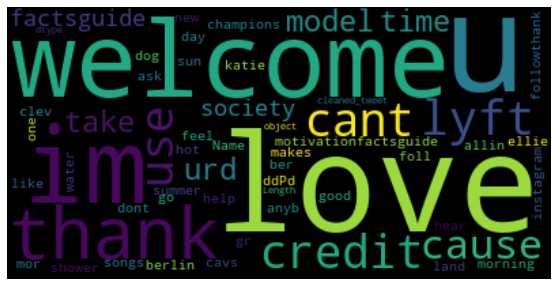

In [24]:
Pos_wordcloud=WordCloud(stopwords=stop_words,max_font_size=100).generate(str(df[df.Sentiment==0].cleaned_tweet))
#Plotting word clouds for all words in good tweets
plt.figure(figsize=(16,5))
plt.imshow(Pos_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [25]:



#----*----------------*------
#Tokenization and Stemming
#----*----------------*------


In [32]:
from nltk.stem import LancasterStemmer
lancaster=LancasterStemmer()
stop_words = stopwords.words('english')

In [33]:
def my_tokenizer(doc): 
    tokens = lancaster.stem(doc)
    for token in tokens:
        return tokenizer.tokenize(str(tokens))
    

In [34]:
tokenizer = RegexpTokenizer("[\w]+")
sw=my_tokenizer(str(stop_words)) 
stop_words = stopwords.words('english') 

In [35]:
def identify_tokens(row):
    Cleaned_Tweet = row['cleaned_tweet']
    tokens = tokenizer.tokenize(Cleaned_Tweet)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words


In [36]:
#Applying the function and output column is tokens
df['Tokenized_words'] = df.apply(identify_tokens, axis=1)


In [37]:

from nltk.corpus import stopwords
stops = set(stopwords.words("english"))                  


In [38]:
#Creating function
def remove_stops(row):
    my_list = row['Tokenized_words']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)


In [39]:
#Applying the funtion and output column is stem_meaningful words in dataframe
df['Meaningful_Words'] = df.apply(remove_stops, axis=1)



In [40]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()
def stem_list(row):
    my_list = row['Meaningful_Words']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)
#Applying the funtion and output column is stemmend words in dataframe
df['stemmed_words'] = df.apply(stem_list, axis=1)



In [41]:

def rejoin_words(row):
    my_list = row['stemmed_words']
    joined_words = ( " ".join(my_list))
    return joined_words
#Reforming the sentence with tokenized words
df['processed'] = df.apply(rejoin_words, axis=1)


In [42]:

#----*----------------*------
#Sampling to balance data
#----*----------------*------
num_0 = len(df[df['Sentiment']==0])
num_1 = len(df[df['Sentiment']==1])
undersampled_data = pd.concat([ df[df['Sentiment']==0].sample(num_1) , df[df['Sentiment']==1] ])
print(len(undersampled_data))



18524


In [43]:
#Creating model data for analysing
Model = undersampled_data[['processed','Sentiment']]


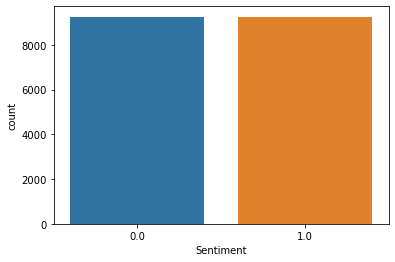

In [44]:
#Checking the balance of the data (Fairly balanced)
import seaborn as sns
sns.countplot(x='Sentiment', data=Model)


In [45]:
#----*----------------*------
#Feature Engineering
#----*----------------*------
#Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# initalising the vectoriser 
tvec = TfidfVectorizer()
#Transforming features of whole data of processed tweets to understand the
#to understand the operation of TFIDF
TFIDF_Matrix = tvec.fit_transform(Model['processed'])
#vec = tvec.named_steps['vec']
features = tvec.get_feature_names()
Label = Model['Sentiment']



In [46]:
#Creating dataframe of TFIDF Sparse matrix
#From the frequency vectors created  for eacgh row of tweet
TFIDF_df = pd.DataFrame(TFIDF_Matrix.toarray(), columns=features)
TFIDF_df
TFIDF_df.columns


Index(['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaa', 'aaaaaaaa',
       'aaaaaaaaaaa', 'aaaaaaaaaaaaaauaaayaaaaaadeg', 'aaaaaaaaaaaaayacaaa',
       ...
       'zshq', 'zuma', 'zurich', 'zuricha', 'zurichatoday', 'zz', 'zzz',
       'zzzzzz', 'zzzzzzsgreat', 'zzzzzzzz'],
      dtype='object', length=37615)

In [47]:
#Selecting few negative words from top positive words and seeing their sparse matrix
Positive = TFIDF_df[['user','love','thank','happi','posit']]
Positive.head(16)


,user,love,thank,happi,posit
0,0.0,0.000000,0.0000,0.000000,0.000000
1,0.0,0.000000,0.0000,0.000000,0.000000
2,0.0,0.000000,0.0000,0.000000,0.000000
3,0.0,0.136386,0.0000,0.000000,0.000000
4,0.0,0.000000,0.0000,0.000000,0.000000
5,0.0,0.000000,0.0000,0.000000,0.000000
6,0.0,0.179234,0.0000,0.000000,0.000000
7,0.0,0.274933,0.0000,0.000000,0.000000
8,0.0,0.000000,0.0000,0.000000,0.000000
9,0.0,0.000000,0.0000,0.000000,0.000000


In [48]:
#Selecting few negative words from top negative words and seeing their sparse matrix
Negative = TFIDF_df[['father','want','bull','sad','hate']]
Negative.tail(16)


,father,want,bull,sad,hate
18508,0.0,0.000000,0.000000,0.000000,0.000000
18509,0.0,0.000000,0.000000,0.000000,0.000000
18510,0.0,0.000000,0.000000,0.000000,0.000000
18511,0.0,0.000000,0.000000,0.000000,0.000000
18512,0.0,0.000000,0.000000,0.000000,0.000000
18513,0.0,0.008242,0.000000,0.000000,0.000000
18514,0.0,0.000000,0.000000,0.000000,0.000000
18515,0.0,0.000000,0.000000,0.000000,0.016566
18516,0.0,0.000000,0.000000,0.000000,0.000000
18517,0.0,0.000000,0.000000,0.000000,0.000000


In [49]:
#Defining a function to get top n tfidf values with their feature names
def top_tfidf_feats(row, features, top_n=5):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df_x = pd.DataFrame(top_feats)
    df_x.columns = ['feature', 'tfidf']
    return df_x


In [50]:
#Defining a function to get top n tfidf values with their feature specific to each row
def top_feats_in_doc(TFIDF_Matrix, features, row_id, top_n=5):
    row = np.squeeze(TFIDF_Matrix[row_id].toarray())
    #get top n tfidf values with their feature names
    return top_tfidf_feats(row, features, top_n)



In [51]:
#Top five feature names for row 100
top_feats_in_doc(TFIDF_Matrix, features, row_id = 100, top_n=5)
#Defining a function to Return the top n features that on average 
#are most important amongst rows identified by indices in grp_ids.
def top_mean_feats(TFIDF_Matrix, features, grp_ids=None, min_tfidf=0.1, top_n=5):
    
    if grp_ids:
        D = TFIDF_Matrix[grp_ids].toarray()
    else:
        D = TFIDF_Matrix.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

top_mean_feats(TFIDF_Matrix, features, grp_ids=None, min_tfidf=0.1, top_n=5)


,feature,tfidf
0,love,0.018052
1,thank,0.014934
2,day,0.013037
3,happi,0.010048
4,amp,0.009565


In [52]:

#Defining a function to return a list of dfs, 
#where each df holds top_n features and their mean tfidf value 
#calculated across rows with the same class label.
def top_feats_by_class(TFIDF_Matrix, Label, features, min_tfidf=0.1, top_n=5):
    dfs = []
    labels = np.unique(Label)
    for label in labels:
        ids = np.where(Label==label)
        feats_df = top_mean_feats(TFIDF_Matrix, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

top_feats_by_class(TFIDF_Matrix, Label, features, min_tfidf=0.1, top_n=5)


[  feature     tfidf
 0    love  0.028703
 1   thank  0.027381
 2     day  0.018274
 3   happi  0.014978
 4    time  0.013202,
   feature     tfidf
 0    bull  0.013962
 1     amp  0.011581
 2    want  0.010377
 3   peopl  0.010004
 4    like  0.009100]

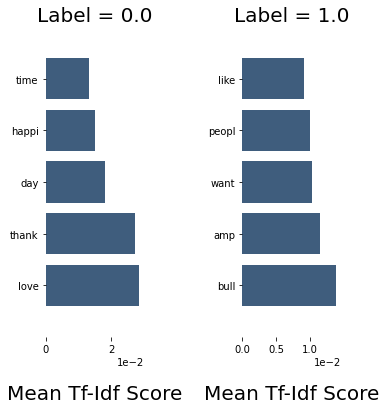

In [53]:

#Plotting the data frames returned by the function plot_tfidf_classfeats
def plot_tfidf_classfeats_h(dfs):
    fig = plt.figure(figsize=(5, 5), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, DF in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=30, fontsize=20)
        ax.set_title("Label = " + str(DF.label), fontsize=20)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, DF.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(DF.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=1)
    plt.show()
    
plot_tfidf_classfeats_h(top_feats_by_class(TFIDF_Matrix, Label, features, min_tfidf=0.1, top_n=5))




In [54]:

#----*----------------*------
#Split and test data
#----*----------------*------

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Model['processed'], Model['Sentiment'], train_size=int(Model.shape[0]*.70),random_state=1)
#Tfidf Vectorizer


In [55]:

# fit the data for vectorization
X_train_tvec = tvec.fit(X_train)
X_train_tvec = tvec.transform(X_train)



In [56]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train_tvec,Y_train )
X_test_tvec = tvec.transform(X_test)
predictions = log_reg.predict(X_test_tvec)


In [57]:
#Calculating the probabilities
probs = log_reg.predict_proba(X_test_tvec)
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score: ', accuracy_score(Y_test, predictions))
print('Precision score: ', precision_score(Y_test, predictions))
print('Recall score: ', recall_score(Y_test, predictions))



Accuracy score:  0.8585822238215185
Precision score:  0.8653136531365314
Recall score:  0.8477946493130875


In [58]:
#F1 Score
from sklearn.metrics import f1_score
f1_score(Y_test,predictions)



0.856464572680789

In [59]:
#Evaluation report of the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
print(confusion_matrix(Y_test,predictions))  
print(classification_report(Y_test,predictions))  
print(accuracy_score(Y_test,predictions))



[[2427  365]
 [ 421 2345]]
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      2792
         1.0       0.87      0.85      0.86      2766

    accuracy                           0.86      5558
   macro avg       0.86      0.86      0.86      5558
weighted avg       0.86      0.86      0.86      5558

0.8585822238215185


In [60]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



In [61]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()



In [62]:
#Taking probabilities of only positive class
Positive_probs = probs[:, 1]



In [63]:
#Taking probabilities of only positive class
Negative_probs = probs[:, 0]


In [64]:
#Calculating AUC value for label =1(hate tweets)
pos_auc = roc_auc_score(Y_test, Positive_probs)
print('AUC:',pos_auc)


AUC: 0.9227373634410473


In [65]:

#Calculating AUC value for label =1(good tweets)
neg_auc = roc_auc_score(Y_test, Negative_probs)
print('AUC' ,neg_auc)


AUC 0.07726263655895266


In [66]:

#Considering false positive rate and true positive rates for ROC
fpr, tpr, thresholds = roc_curve(Y_test, Positive_probs)


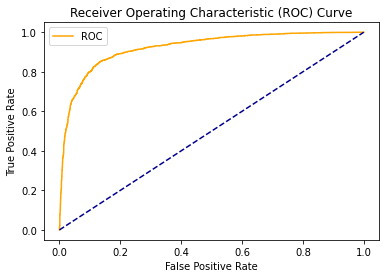

In [67]:

#Plotting ROC
plot_roc_curve(fpr, tpr)